In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import LabelEncoder
import panel as pn

In [11]:
file = "../data/raw/houses_moreinfo.csv"
df = pd.read_csv(file)

In [12]:
# Must-have cleaning
df = df.drop('has_balcony', axis=1) # Remove 'has_balcony' column
df = df[df['price'].notna()] # Remove all properties where 'price' is NaN
df = df[df['life_annuity'] != 1] # Remove all properties with life annuity
df = df.drop('life_annuity', axis=1)
df = df.drop('id', axis=1)
df = df.drop('sale_type', axis=1)
df = df.drop('type_sale', axis=1)
df = df[~df['subtype'].isin(
    ['MIXED_USE_BUILDING', 'OTHER_PROPERTY',
     'MANSION', 'MANOR_HOUSE', 'CASTLE',
    'MIXED_USE_BUILDING', 'APARTMENT_BLOCK'])]

# Optional cleaning
#df = df[df['heating'].notna()]
#df = df[df['epc'].notna()]
#df = df[df['state_construction'].notna()]
#df = df[df['bathrooms'].notna()]
#df = df[df['construction_year'].notna()]

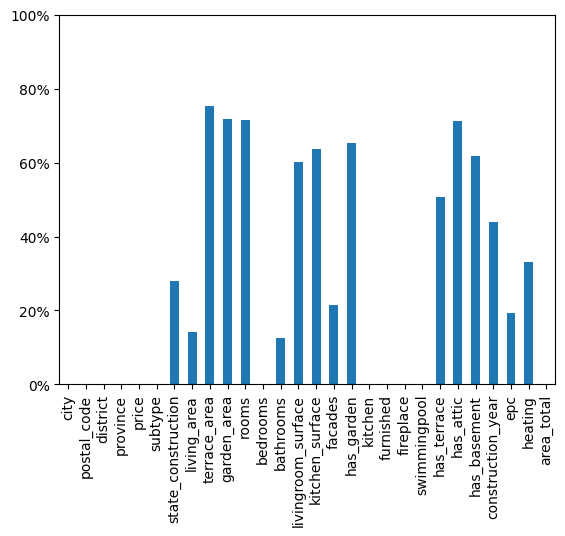

In [13]:
number_of_rows = df.shape[0]
number_of_nan_rows = df.isna().sum()
percentage_of_nan = (number_of_nan_rows / number_of_rows) * 100

percentage_of_nan.plot(kind='bar')
plt.ylim(0, 100)
ticks = np.arange(0, 101, step=20)

plt.yticks(ticks, [f"{tick}%" for tick in ticks])

plt.show()

In [14]:
print('Number of properties left after cleaning:', df.shape[0])

Number of properties left after cleaning: 38520


In [15]:
df.columns

Index(['city', 'postal_code', 'district', 'province', 'price', 'subtype',
       'state_construction', 'living_area', 'terrace_area', 'garden_area',
       'rooms', 'bedrooms', 'bathrooms', 'livingroom_surface',
       'kitchen_surface', 'facades', 'has_garden', 'kitchen', 'furnished',
       'fireplace', 'swimmingpool', 'has_terrace', 'has_attic', 'has_basement',
       'construction_year', 'epc', 'heating', 'area_total'],
      dtype='object')

In [16]:
# Create the histogram
fig1 = px.histogram(df, x="state_construction", histnorm='percent')
fig1.update_yaxes(range=[0, 100])

# Create the bar chart
mean_price_per_state_construction = df.groupby('state_construction')['price'].mean()
fig2 = px.bar(x=mean_price_per_state_construction.index, y=mean_price_per_state_construction.values, labels={'x':'State of the construction', 'y':'mean price'})

# Create a figure with subplots
fig = go.Figure()

# Add the histogram to the figure
fig.add_trace(fig1.data[0])

# Add the bar chart to the figure
fig.add_trace(fig2.data[0])

# Hide the second trace (the bar chart) by default
fig.data[1].visible = False

# Create a dropdown menu
buttons = [
    dict(label="State of construction in %", method="update", args=[{"visible": [True, False]}]),
    dict(label="Mean Price of each state", method="update", args=[{"visible": [False, True]}])
]

# Add the dropdown menu to the figure
fig.update_layout(updatemenus=[dict(buttons=buttons)])

# Show the figure
fig.show()

In [17]:
fig = px.pie(df, names='subtype', title='Type of Real Estate in Belgium')
fig.show()

In [18]:
mean_price_per_province = df.groupby('province')['price'].mean().sort_values(ascending=False)
px.bar(x=mean_price_per_province.index, y=mean_price_per_province.values, labels={'x':'Province', 'y':'Mean price'})

In [19]:
number_of_properties_per_province = df['province'].value_counts().sort_index()
px.bar(x=number_of_properties_per_province.index, y=number_of_properties_per_province.values)

In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(x=number_of_properties_per_province.index, y=number_of_properties_per_province.values,
                     name='Number of Properties', marker_color='red'))

fig.update_layout(barmode='group')
